# HOUSE PRICE PREDICTION PROJECT USING REGRESSION MODEL

### The purpose of the project is to analyse the dataset and train a model to predict the house price. I have used multiple linear regression and decision tree for this task.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
house=pd.read_csv("DataSet\house_price.csv")
house

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000
...,...,...,...,...,...,...,...
995,Bommanahalli,3,1,1460,1,2,25000
996,Whitefield,3,0,2100,1,7,28000
997,Bommanahalli,2,0,1033,5,0,16500
998,Bommanahalli,3,0,1500,10,1,22000


In [3]:
house.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [4]:
house.shape

(1000, 7)

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
house["Location"]=le.fit_transform(house["Location"])
house

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,0,3,1,3000,1,3,28000
1,0,3,1,1650,10,0,18000
2,1,2,0,1000,5,3,16400
3,1,3,0,1600,1,9,27000
4,1,2,1,1200,5,1,20000
...,...,...,...,...,...,...,...
995,0,3,1,1460,1,2,25000
996,1,3,0,2100,1,7,28000
997,0,2,0,1033,5,0,16500
998,0,3,0,1500,10,1,22000


In [6]:
house.groupby('Location')["Location"].count()

Location
0    504
1    496
Name: Location, dtype: int64

In [7]:
house.describe()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.496000,2.436000,0.348000,1448.613000,4.029000,3.465000,22829.900000
std,0.500234,0.496135,0.476574,491.272535,3.048845,3.245197,7706.410627
min,0.000000,2.000000,0.000000,767.000000,1.000000,0.000000,11000.000000
25%,0.000000,2.000000,0.000000,1089.000000,1.000000,1.000000,16500.000000
50%,0.000000,2.000000,0.000000,1300.000000,5.000000,3.000000,21000.000000
75%,1.000000,3.000000,1.000000,1650.000000,5.000000,3.000000,26000.000000
max,1.000000,3.000000,1.000000,3155.000000,10.000000,13.000000,45000.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

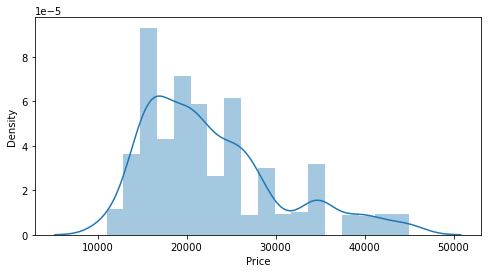

In [8]:
plt.figure(figsize=(8,4))
sns.distplot(house['Price'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Floor', ylabel='count'>

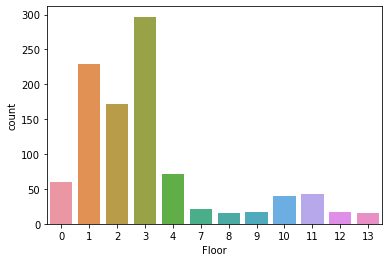

In [9]:
sns.countplot(house['Floor'])

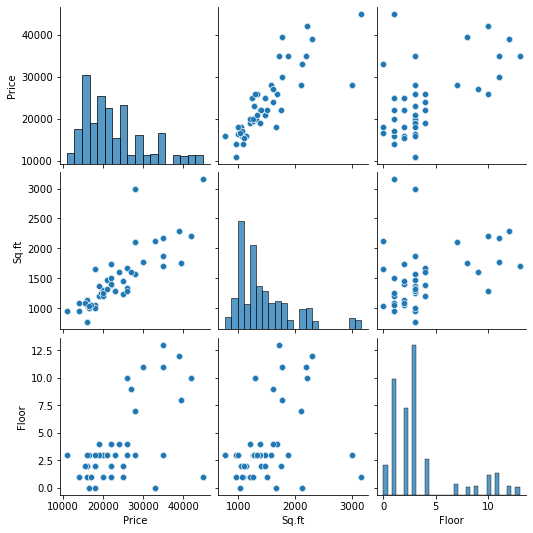

In [10]:
sns.pairplot(house[['Price','Sq.ft','Floor']])

In [11]:
sns.set(style="white")

# Compute the correlation matrix
corr = house.corr()
corr

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
Location,1.000000,0.031234,-0.279677,0.285944,-0.296259,0.439258,0.518486
BHK,0.031234,1.000000,0.136625,0.689055,-0.186380,0.337754,0.633094
Furnishing,-0.279677,0.136625,1.000000,0.042385,0.091563,-0.078199,0.018996
Sq.ft,0.285944,0.689055,0.042385,1.000000,-0.258306,0.376009,0.831104
Old(years),-0.296259,-0.186380,0.091563,-0.258306,1.000000,-0.197940,-0.304325
Floor,0.439258,0.337754,-0.078199,0.376009,-0.197940,1.000000,0.599192
Price,0.518486,0.633094,0.018996,0.831104,-0.304325,0.599192,1.000000


* BY ABOVE CORRELATION WE SEE THAT MOST IMPORTAT FEATURE IS SQ.FT 

<AxesSubplot:>

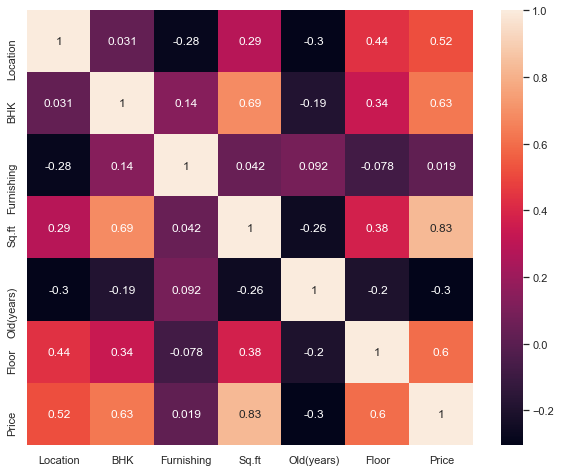

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(house.corr(), annot=True)

In [13]:
X=house.drop(['Price','Furnishing'],axis=1)
y=house['Price']
X

,Location,BHK,Sq.ft,Old(years),Floor
0,0,3,3000,1,3
1,0,3,1650,10,0
2,1,2,1000,5,3
3,1,3,1600,1,9
4,1,2,1200,5,1
...,...,...,...,...,...
995,0,3,1460,1,2
996,1,3,2100,1,7
997,0,2,1033,5,0
998,0,3,1500,10,1


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()

In [15]:
house["Sq.ft"]=scaling.fit_transform(house[["Sq.ft"]])
house["Old(years)"]=scaling.fit_transform(house[["Old(years)"]])
house["BHK"]=scaling.fit_transform(house[["BHK"]])
house["Furnishing"]=scaling.fit_transform(house[["Furnishing"]])
house["Floor"]=scaling.fit_transform(house[["Floor"]])
house

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,0,1.0,1.0,0.935092,0.000000,0.230769,28000
1,0,1.0,1.0,0.369765,1.000000,0.000000,18000
2,1,0.0,0.0,0.097571,0.444444,0.230769,16400
3,1,1.0,0.0,0.348827,0.000000,0.692308,27000
4,1,0.0,1.0,0.181323,0.444444,0.076923,20000
...,...,...,...,...,...,...,...
995,0,1.0,1.0,0.290201,0.000000,0.153846,25000
996,1,1.0,0.0,0.558208,0.000000,0.538462,28000
997,0,0.0,0.0,0.111390,0.444444,0.000000,16500
998,0,1.0,0.0,0.306951,1.000000,0.076923,22000


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [17]:
y_test

249    16500
353    35000
537    19000
424    22000
564    20000
       ...  
684    19000
644    35000
110    26000
28     15500
804    33000
Name: Price, Length: 200, dtype: int64

In [18]:
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train,y_train)

LinearRegression()

In [19]:
pred=multiple_reg.predict(X_test)
pred


array([14333.4823999 , 29256.50523255, 21376.93041561, 22138.78092267,
       19437.87888997, 21160.98511273, 22541.64822331, 32832.67633728,
       18523.04353622, 15062.65101321, 21905.60845283, 18196.11934407,
       21905.60845283, 33340.56286445, 19437.87888997, 21967.84753623,
       19155.05092285, 13826.44839305, 16030.23784036, 19513.80128215,
       19513.80128215, 19697.10612389, 19210.92679818, 15866.42914307,
       19155.05092285, 17777.5530892 , 39591.04229717, 19210.92679818,
       24549.05781299, 36178.90530213, 37836.06526836, 20552.04724745,
       35441.25901577, 22138.78092267, 28530.51092998, 16030.23784036,
       30526.31156757, 20552.04724745, 29256.50523255, 36535.35458731,
       19155.05092285, 15866.42914307, 21759.0269225 , 21759.0269225 ,
       25166.3950167 , 16030.23784036, 14151.77507168, 31182.46102599,
       15866.42914307, 33340.56286445, 13826.44839305, 30196.97877419,
       19437.87888997, 36535.35458731, 21967.84753623, 19155.05092285,
      

In [20]:
y_test

249    16500
353    35000
537    19000
424    22000
564    20000
       ...  
684    19000
644    35000
110    26000
28     15500
804    33000
Name: Price, Length: 200, dtype: int64

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.850208220485248

# DecisionTreeRegressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


In [23]:
regressor=DecisionTreeRegressor()
clf=regressor.fit(X_train,y_train)

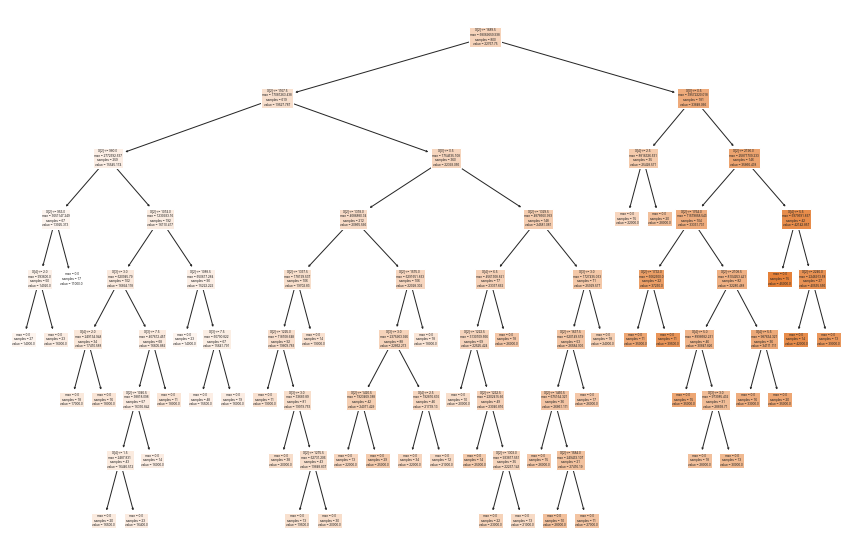

In [24]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True);

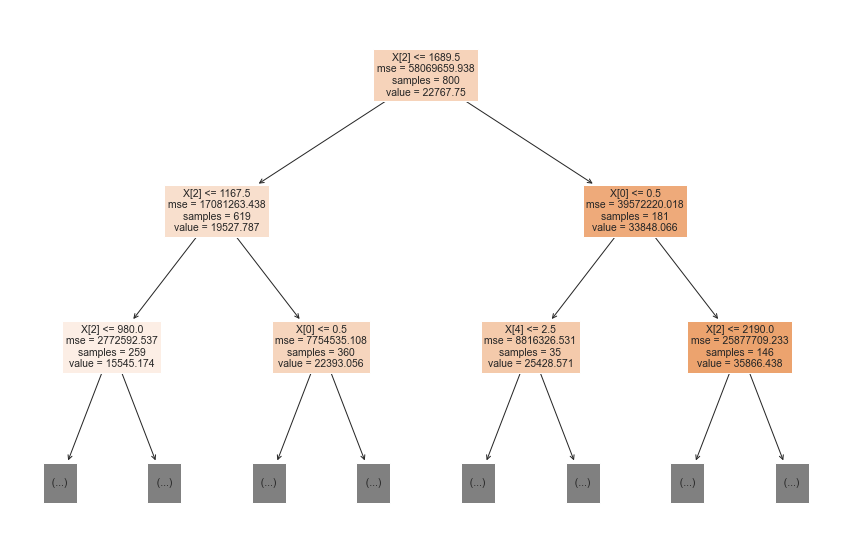

In [25]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True,max_depth=2);

In [26]:
pred=regressor.predict(X_test)
pred

array([16500., 35000., 19000., 22000., 20000., 22000., 26000., 30000.,
       22000., 11000., 23000., 20000., 23000., 35000., 20000., 21000.,
       17000., 16000., 16000., 16400., 16400., 18000., 14000., 15500.,
       17000., 19500., 45000., 14000., 28000., 42000., 39000., 25000.,
       28000., 22000., 26000., 16000., 27000., 25000., 35000., 35000.,
       17000., 15500., 25000., 25000., 24000., 16000., 14000., 39500.,
       15500., 35000., 16000., 33000., 20000., 35000., 21000., 17000.,
       14000., 18000., 20000., 28000., 22000., 25000., 27000., 18000.,
       25000., 25000., 11000., 35000., 39500., 15500., 23000., 16400.,
       18000., 21000., 18000., 28000., 14000., 28000., 14000., 20000.,
       42000., 16000., 35000., 27000., 22000., 35000., 21000., 23000.,
       45000., 21000., 25000., 39500., 26000., 25000., 14000., 20000.,
       28000., 21000., 22000., 17000., 22000., 19500., 27000., 18000.,
       30000., 26000., 11000., 14000., 19500., 20000., 15500., 26000.,
      

In [27]:
y_test

249    16500
353    35000
537    19000
424    22000
564    20000
       ...  
684    19000
644    35000
110    26000
28     15500
804    33000
Name: Price, Length: 200, dtype: int64

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
confusion_matrix(y_test,pred)
accuracy_score(y_test,pred)

1.0

Text(0, 0.5, 'Features')

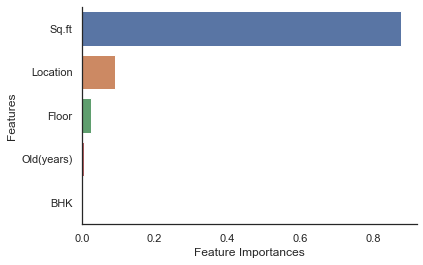

In [30]:
feature = regressor.feature_importances_
feature_importances = pd.Series(feature, index=X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")

## Conclusion and Analysis


* Sq.ft of house is the important feature in deciding the price of the house.
* FLOOR, and LOCATION are equally important feature.
* Accuracy is 100% in dicision tree regressor model this could be due to the fact because of small dataset
* Accuracy is low in multiple linear regression model.


### Thank you